<a href="https://colab.research.google.com/github/Diluxana/Cryptography/blob/master/7072CEM_Diluxana_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
import math
import statsmodels.api as sa
from statsmodels.formula.api import ols
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from matplotlib import rcParams
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import friedmanchisquare, wilcoxon
import itertools
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn import tree
import graphviz
!pip install scikit-posthocs
import scikit_posthocs as sp
!pip install apyori
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
!pip install association-metrics
import association_metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import permutation_importance
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.anova import AnovaRM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=8547fc95b5ce08ef1592cb728fa7b34fc7d44bcd222aa8d15589c52aa076682b
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3930 sha256=d1c6b1db84ce9fea894a9aaed608ec4f6322a8a0a953aa73a47423d4f6fcf3a9
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association-metrics


In [2]:
white_wine = pd.read_csv('/content/sample_data/winequality-white.csv', sep=';')
red_wine = pd.read_csv('/content/sample_data/winequality-red.csv',  sep=';')

In [3]:
white_wine.shape

(4898, 12)

In [4]:
red_wine.shape

(1599, 12)

In [5]:
#Creating new row for wine type where 0 = White and 1 = Red.
white_wine.insert(11, "wine_type", 0)
red_wine.insert(11, "wine_type", 1)

In [6]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6


In [7]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


In [8]:
frames = [white_wine, red_wine]
wine_data_all = pd.concat(frames)

In [9]:
wine_data_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6


In [10]:
wine_data_all.shape

(6497, 13)

In [11]:
#All attributes (except for quality and wine type) are float64 (eg, ratio).
#Quality and wine type are int64.
wine_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  wine_type             6497 non-null   int64  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [12]:
#There are no missing values in the dataset.
wine_data_all.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_type               0
quality                 0
dtype: int64

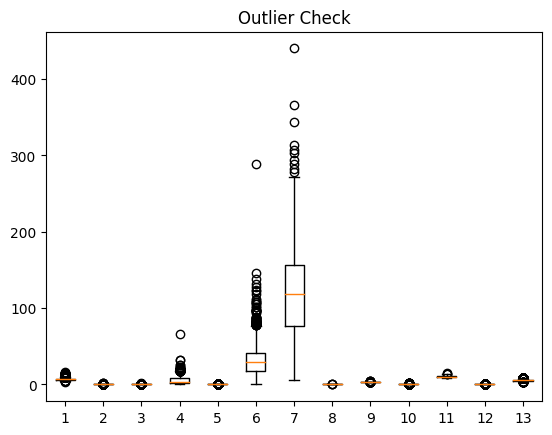

In [13]:
fig, ax = plt.subplots()
ax.set_title('Outlier Check')
ax.boxplot(wine_data_all)
plt.show()

In [14]:
#Visually, we can see that columns 4, 6, and 7 have outliers. These outliers could be important for detecting wine quality, and we'll be using normalization procedures for ML so I will leave as is.

In [15]:
#looks good, no negative values.
wine_data_all.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,9.000000


In [16]:
#Complete duplications in a pd dataframe.
length1 = len(wine_data_all)
wine_data_all.drop_duplicates(keep=False, inplace=True)
length2 = len(wine_data_all)
print('Before Duplication',length1)
print('After remove Duplication',length2)

Before Duplication 6497
After remove Duplication 4328


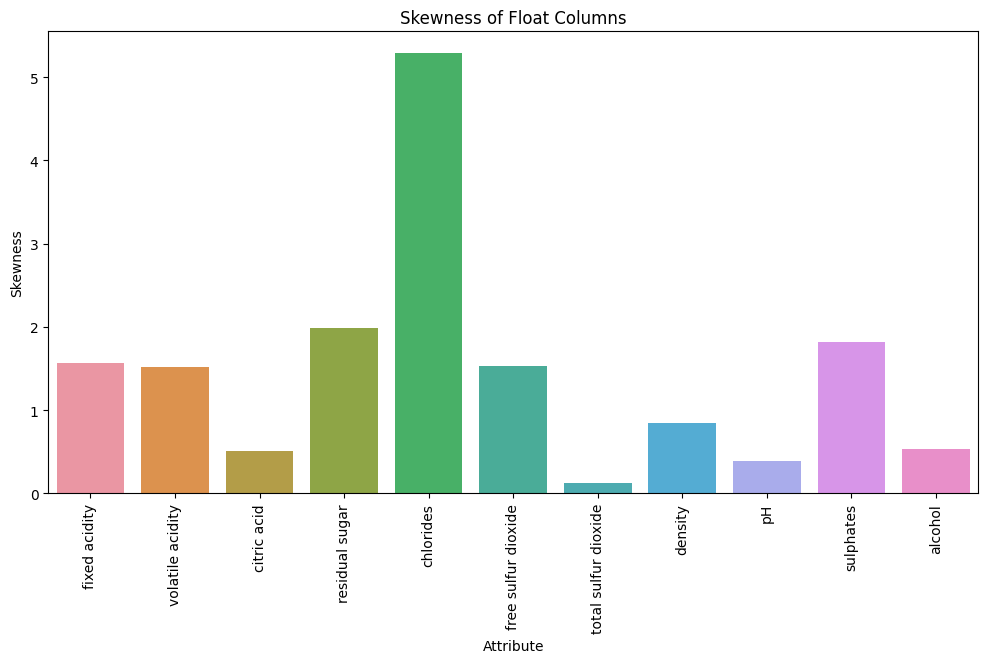

In [17]:
# Assuming wine_data_all is the combined DataFrame of red and white wine data

flt_columns = list(wine_data_all.select_dtypes(include=["float64"]).columns)

skewness = {}
for col in flt_columns:
    skewness[col] = stats.mstats.skew(wine_data_all[col])

skewness_df = pd.DataFrame(skewness, index=["skewness"]).transpose()

plt.figure(figsize=(12, 6))
sb.barplot(x=skewness_df.index, y='skewness', data=skewness_df)
plt.xticks(rotation=90)
plt.xlabel('Attribute')
plt.ylabel('Skewness')
plt.title('Skewness of Float Columns')
plt.show()


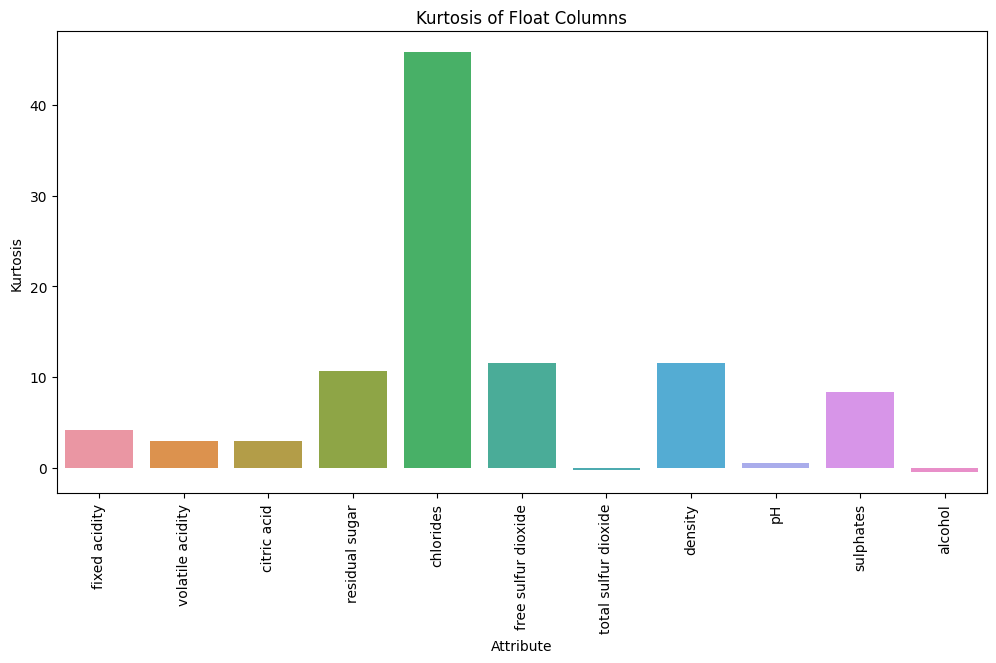

In [18]:
#kurtosis is a useful statistical measure that provides insights into the shape, distribution, and characteristics of a dataset. By considering kurtosis, analysts and data scientists can gain a deeper understanding of the data, identify outliers, assess model assumptions, and make informed decisions regarding data analysis and modeling.
kurtosis = []
for col in flt_columns:
    kurtosis.append(stats.kurtosis(wine_data_all[col]))

kurtosis_df = pd.DataFrame({'Attribute': flt_columns, 'Kurtosis': kurtosis})

plt.figure(figsize=(12, 6))
sb.barplot(x='Attribute', y='Kurtosis', data=kurtosis_df)
plt.xticks(rotation=90)
plt.xlabel('Attribute')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Float Columns')
plt.show()


In [ ]:
#As we can see, most of the columns are significantly skewed to the right. So our dataset will require normalization. As well, this means that we will use non-parametric tests for our exploratory analyses.

<ipython-input-19-cdedb205f2c9>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cm = wine_corr_data.corr().drop(["quality", "wine_type"], 1).drop(["quality", "wine_type"])


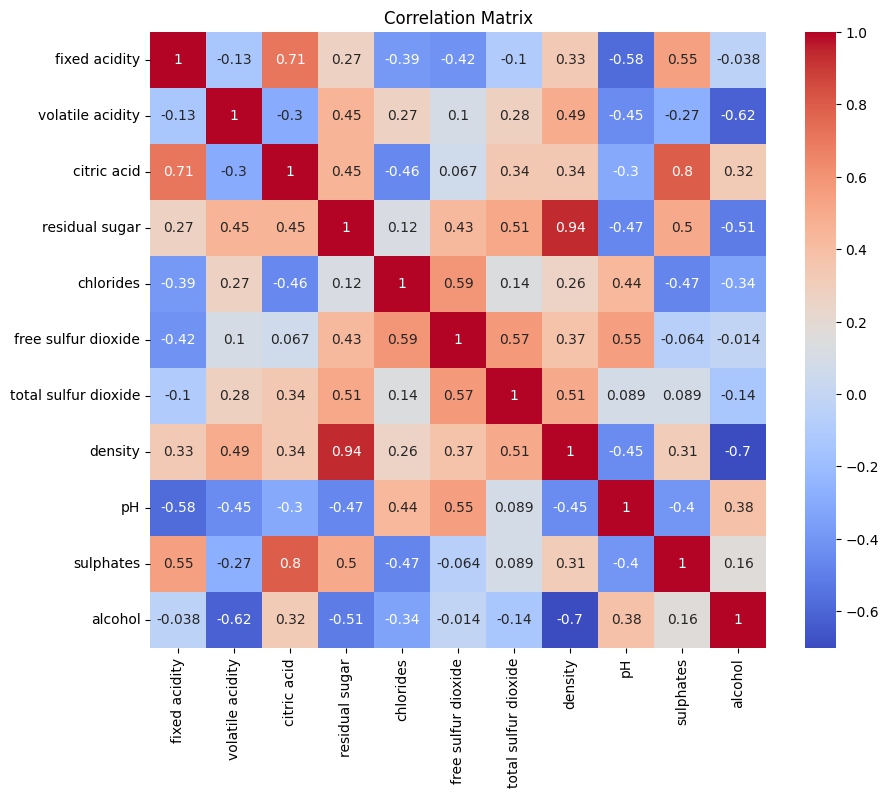

In [19]:
#check the correlation between attributes other than Quality
# Matrix of pearsons correlations.i note that only continous attributes are included in the correlation measures (eg, did not include wine type).
#wine_corr_data = wine_data_all.drop(["quality", "wine_type"], axis=1)
# Assuming wine_corr_data is the DataFrame containing continuous attributes (excluding "quality" and "wine_type")

# Assuming wine_data_all is the DataFrame containing the wine data
wine_corr_data = wine_data_all[0:10]
cm = wine_corr_data.corr().drop(["quality", "wine_type"], 1).drop(["quality", "wine_type"])

plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()



/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
<ipython-input-20-a4cdb925f581>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pr = pr.drop(["quality", "wine_type"], 1).drop(["quality", "wine_type"])


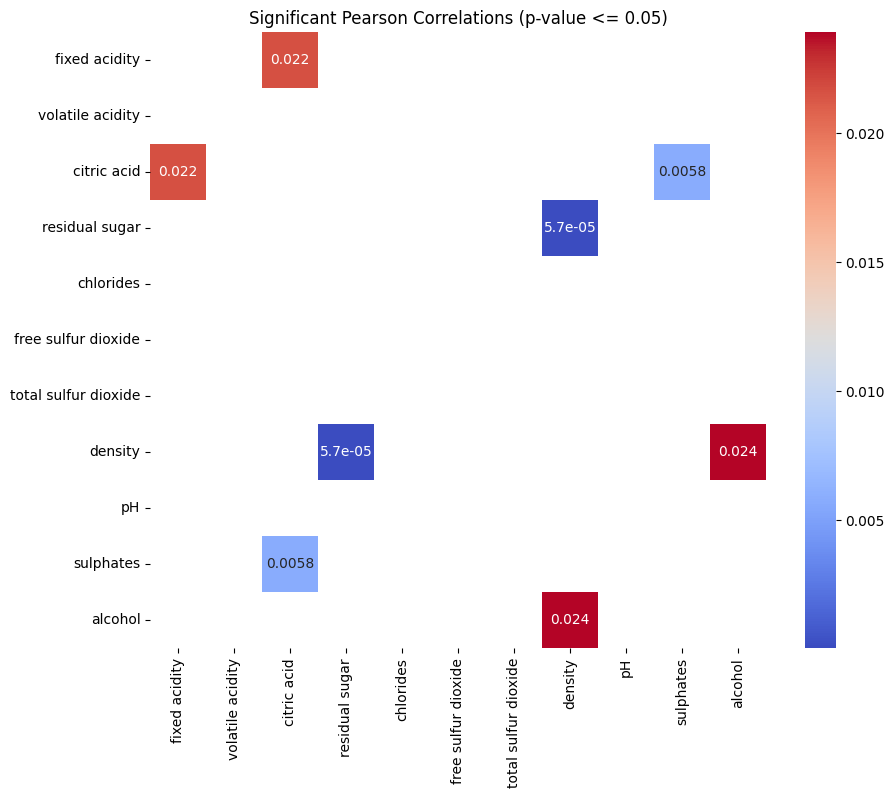

In [20]:
#Significance (eg, p-value) of the pearson correlations.
#Assuming wine_corr_data is the DataFrame containing continuous attributes (excluding "quality" and "wine_type")

pr = wine_corr_data.corr(method=lambda x, y: stats.pearsonr(x, y)[1])
pr = pr.drop(["quality", "wine_type"], 1).drop(["quality", "wine_type"])
pr_sig = pr[pr <= 0.05]

plt.figure(figsize=(10, 8))
sb.heatmap(pr_sig, annot=True, cmap="coolwarm", square=True)
plt.title('Significant Pearson Correlations (p-value <= 0.05)')
plt.show()

In [ ]:
# The correlations between all the attributes can be seen in the above correlation matrix. Notable correlations (eg, attributes that are significantly correlated with each other)
# include:
# fixed acidity and citric acid (r=0.72,p=0.02)
# citric acid and sulphates (r=0.80, p=0.0058)
# residual sugar and density (r=0.95,p=5.7e-05)
# density and alcohol (r=-0.70,p=0.024)
# So, we'll do some feature selection analyses to remove any insignificant variables that are highly correlated. It looks like citric acid and density may need to be removed because of the high correlations.

(array([  30.,  196.,    0., 1405.,    0., 1889.,  688.,    0.,  115.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

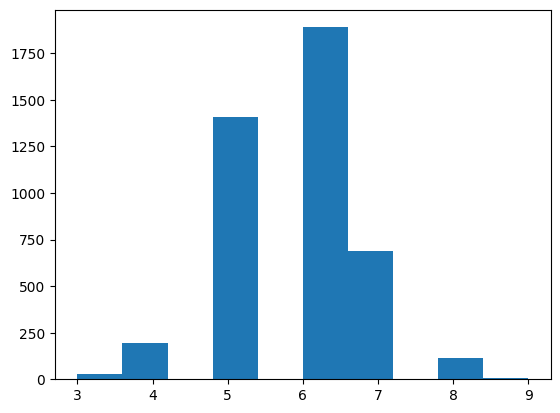

In [21]:
plt.hist(wine_data_all["quality"],
         label="Distribution of quality")

In [22]:
wine_data_all["quality"].value_counts()

6    1889
5    1405
7     688
4     196
8     115
3      30
9       5
Name: quality, dtype: int64

In [ ]:
#make things simple and reduce the ratings for quality to three levels as high, medium, and low. i Assign the levels of 3 and 4 to level 0; 5 and 6 to level 1; and 7,8, and 9 to level 2.

In [23]:
#Reducing the quality ratings to [0,1,2] where 0 = Low, 1 = Medium, and 2 = High.
#Creating function to label quality ratings.
def label_quality(row):
    if row["quality"] <= 4:
        return 0
    elif row["quality"] >= 7:
        return 2
    else:
        return 1
#Applying function to dataframe.
wine_data_all["quality_check"] = wine_data_all.apply(lambda row: label_quality(row), axis=1)

In [24]:
#Confirmation of the new column.
wine_data_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality,quality_check
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0,6,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0,6,1
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,0,5,1
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,0,5,1
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,0,5,1


In [25]:
#Confirming that the new levels are filled properly.
#Notable class imbalance.
wine_data_all["quality_check"].value_counts()

1    3294
2     808
0     226
Name: quality_check, dtype: int64

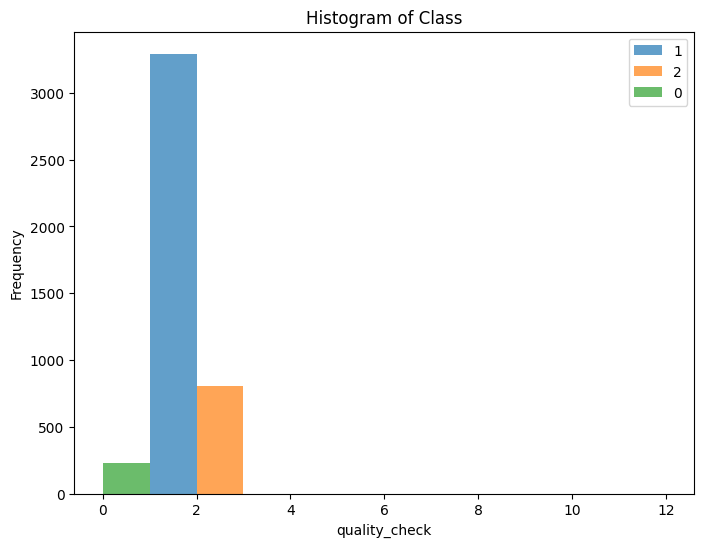

In [26]:
# Assuming wine_data_all is the DataFrame containing the "quality_check" variable
unique_values = wine_data_all["quality_check"].unique()
num_bins = len(unique_values)

plt.figure(figsize=(8, 6))
for i, val in enumerate(unique_values):
    plt.hist(wine_data_all[wine_data_all["quality_check"] == val]["quality_check"], bins=range(0, num_bins+10),
             alpha=0.7, label=str(val))

# Adding labels and title
plt.xlabel('quality_check')
plt.ylabel('Frequency')
plt.title('Histogram of Class')
plt.legend()

# Displaying the histogram
plt.show()


In [27]:
#Checking the data type.
wine_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4328 entries, 6 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4328 non-null   float64
 1   volatile acidity      4328 non-null   float64
 2   citric acid           4328 non-null   float64
 3   residual sugar        4328 non-null   float64
 4   chlorides             4328 non-null   float64
 5   free sulfur dioxide   4328 non-null   float64
 6   total sulfur dioxide  4328 non-null   float64
 7   density               4328 non-null   float64
 8   pH                    4328 non-null   float64
 9   sulphates             4328 non-null   float64
 10  alcohol               4328 non-null   float64
 11  wine_type             4328 non-null   int64  
 12  quality               4328 non-null   int64  
 13  quality_check         4328 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 507.2 KB


In [28]:
wine_data_all.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type', 'quality', 'quality_check'],
      dtype='object')

In [29]:
#normalize the numeric attributes.
#Applying normalization to select columns. Also removing the "quality" attribute
#from the normalized dataset.
wine_data_normalized = wine_data_all.copy()
wine_data_normalized.drop("quality", axis=1, inplace=True)
columns_to_normalize = ["fixed acidity","volatile acidity","citric acid",
                               "residual sugar","chlorides","free sulfur dioxide",
                               "total sulfur dioxide","density","pH","sulphates",
                               "alcohol"]
wine_data_normalized[columns_to_normalize] = wine_data_normalized[columns_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
wine_data_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,quality_check
6,0.198347,0.157191,0.096386,0.096774,0.059801,0.100694,0.299539,0.150183,0.356589,0.140449,0.231884,0,1
9,0.355372,0.090301,0.259036,0.012289,0.058140,0.093750,0.283410,0.128976,0.387597,0.129213,0.434783,0,1
10,0.355372,0.123746,0.246988,0.011521,0.039867,0.034722,0.131336,0.071139,0.209302,0.191011,0.579710,0,1
11,0.396694,0.096990,0.240964,0.053763,0.043189,0.055556,0.237327,0.146327,0.325581,0.174157,0.246377,0,1
12,0.338843,0.063545,0.222892,0.007680,0.051495,0.052083,0.158986,0.094274,0.356589,0.230337,0.405797,0,1


In [30]:
#check the attributes differ across quality level for red and white wines
#Addressing this question with a 2 x 3 factorial ANOVA.
#Below code iterates through the dataframe to calculate a 2x3 ANOVA for each attribute.

keys = []
tables = []
for column in wine_data_normalized:
    if column != "quality_check" and column != "wine_type":
        formula = "Q('{}') ~ C(quality_check, Sum) + C(wine_type, Sum) + C(quality_check, Sum):C(wine_type, Sum)".format(column)
        model = ols(formula, data=wine_data_normalized).fit()
        aov_table = sa.stats.anova_lm(model, typ=2)
        keys.append(column)
        tables.append(aov_table)

df_aov = pd.concat(tables, keys=keys, axis=0)


In [31]:
print(df_aov)

                                                                  sum_sq  \
fixed acidity        C(quality_check, Sum)                      0.046035   
                     C(wine_type, Sum)                         12.219459   
                     C(quality_check, Sum):C(wine_type, Sum)    0.549075   
                     Residual                                  39.820349   
volatile acidity     C(quality_check, Sum)                      1.957690   
                     C(wine_type, Sum)                         22.674737   
                     C(quality_check, Sum):C(wine_type, Sum)    0.957141   
                     Residual                                  31.291556   
citric acid          C(quality_check, Sum)                      0.247221   
                     C(wine_type, Sum)                          1.043589   
                     C(quality_check, Sum):C(wine_type, Sum)    0.561616   
                     Residual                                  32.631373   
residual sug

In [32]:
significant_attributes = df_aov[df_aov['PR(>F)'] < 0.05]
significant_attributes_list = list(significant_attributes.index.get_level_values(0).unique())

print("Significant attributes across quality levels:")
for attribute in significant_attributes_list:
    print(attribute)


Significant attributes across quality levels:
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


In [33]:
significant_attributes = df_aov[df_aov.index.get_level_values(1) == 'C(quality_check, Sum):C(wine_type, Sum)']
significant_attributes_list = list(significant_attributes.index.get_level_values(0).unique())

print("Significant attributes across red and white wines:")
for attribute in significant_attributes_list:
    print(attribute)


Significant attributes across red and white wines:
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


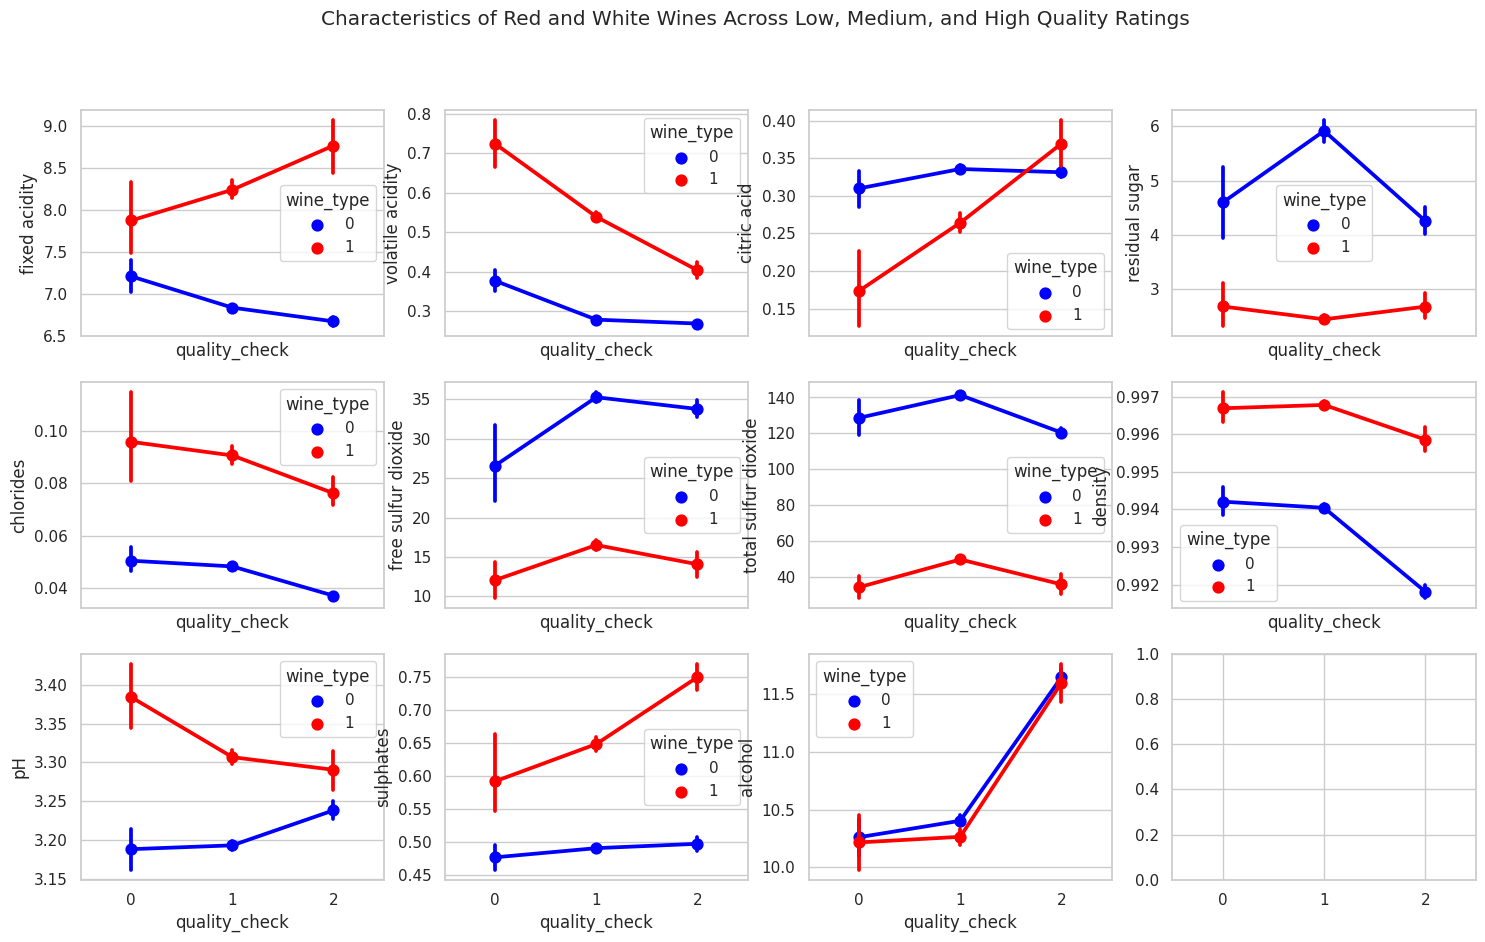

In [34]:
#Visualization of exploratory data analysis
wine_plot = wine_data_all

sb.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 4, sharex = True, figsize=(18,10))
fig.suptitle("Characteristics of Red and White Wines Across Low, Medium, and High Quality Ratings")
sb.pointplot(ax=axes[0,0], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["fixed acidity"], palette=["blue", "red"])
sb.pointplot(ax=axes[0,1], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["volatile acidity"], palette=["blue", "red"])
sb.pointplot(ax=axes[0,2], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["citric acid"], palette=["blue", "red"])
sb.pointplot(ax=axes[0,3], x=wine_plot["quality_check"], hue=wine_plot["wine_type"],  y=wine_plot["residual sugar"], palette=["blue", "red"])
sb.pointplot(ax=axes[1,0], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["chlorides"], palette=["blue", "red"])
sb.pointplot(ax=axes[1,1], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["free sulfur dioxide"], palette=["blue", "red"])
sb.pointplot(ax=axes[1,2], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["total sulfur dioxide"], palette=["blue", "red"])
sb.pointplot(ax=axes[1,3], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["density"], palette=["blue", "red"])
sb.pointplot(ax=axes[2,0], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["pH"], palette=["blue", "red"])
sb.pointplot(ax=axes[2,1], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["sulphates"], palette=["blue", "red"])
sb.pointplot(ax=axes[2,2], x=wine_plot["quality_check"], hue=wine_plot["wine_type"], y=wine_plot["alcohol"], palette=["blue", "red"])
plt.show()


In [35]:
X = wine_data_normalized.drop(columns=["quality_check"])
y = wine_data_normalized["quality_check"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

               Attribute  Importance
1       volatile acidity    4.536934
0          fixed acidity    1.032256
4              chlorides    0.911281
7                density    0.369593
8                     pH    0.261733
6   total sulfur dioxide   -0.692794
2            citric acid   -0.701130
3         residual sugar   -0.860420
9              sulphates   -0.961847
11             wine_type   -1.065943
5    free sulfur dioxide   -1.446365
10               alcohol   -2.490155


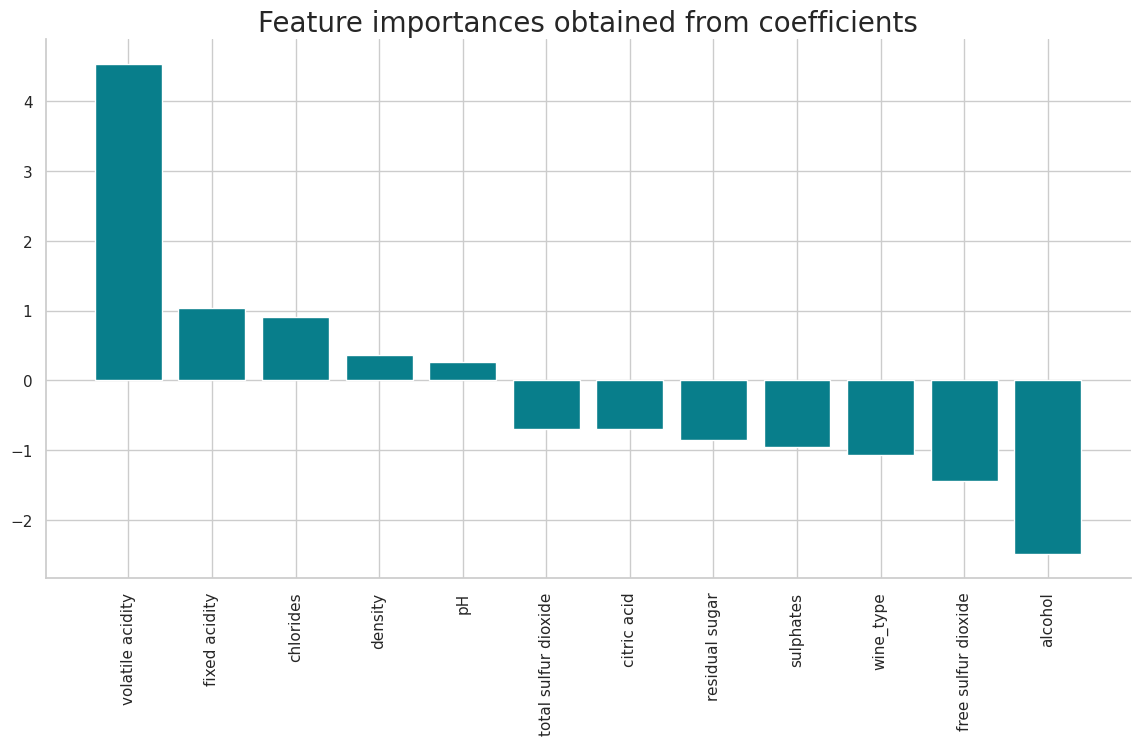

In [36]:
#Feature selection with variable importance.
#Relevant for categorical dependent variables.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000) #multi-class
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

#Visualization.
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Score list: [ 0.4702823  12.47680477  1.22601156  2.10996077  4.13887155  0.89784015
  1.6479357   6.55250003  0.34338435  0.1934689  42.1776879  20.7723777 ]
Feature list: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type'],
      dtype='object')


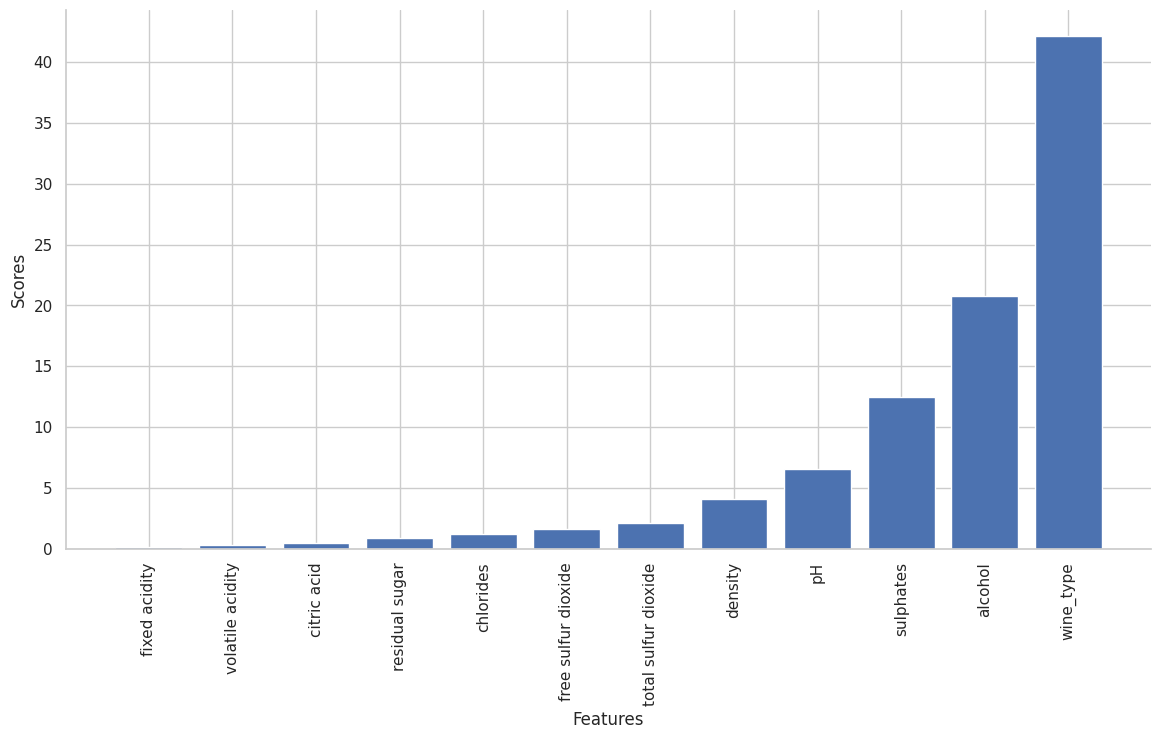

In [37]:
#Feature selection with random forest classification.
#For categorical dependent variable.
#k is the number of features and is adjustable
#Cannot handle negative values
select_feature = SelectKBest(chi2, k=12).fit(X_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

#TK on visualization.
#cross-validation and visualization.
plt.figure()
plt.xlabel("Features")
plt.ylabel("Scores")
plt.bar(x=X_train.columns, height=sorted(select_feature.scores_))
plt.xticks(rotation='vertical')
plt.show()

Optimal number of features : 12
Best features : Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type'],
      dtype='object')


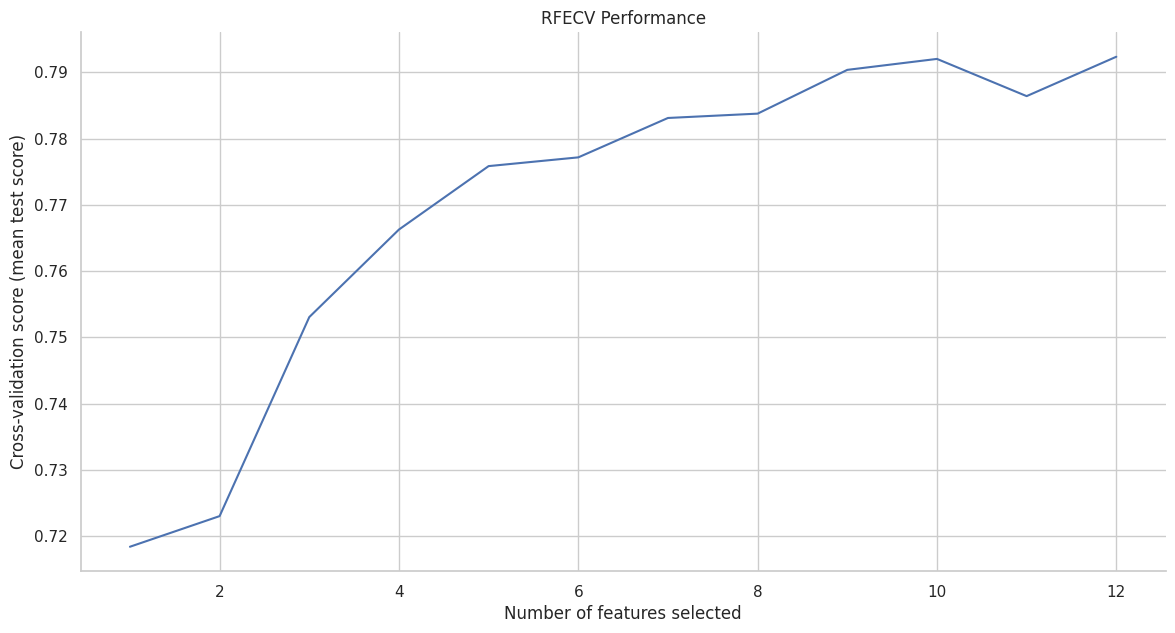

In [38]:
#Feature selection with cross validation and random forest classification.
#For categorical dependent variables. Determines the best number of variables.
clf_rfc = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rfc, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (mean test score)")
plt.title("RFECV Performance")
plt.show()

In [39]:
#Multinomial logistic regression.
#Standard test-train split.
mlr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs') #max_iter = 1000 if
mlr_model.fit(X_train, y_train)

#Predictions.
pred = mlr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print('accuracy',accuracy)
# Calculate precision score (macro average)
precision_macro = precision_score(y_test, pred, average='macro')
print("precision_score (macro):", precision_macro)

# Calculate recall score (macro average)
recall_macro = recall_score(y_test, pred, average='macro')
print("recall_score (macro):", recall_macro)

# Calculate F1 score (macro average)
f1_macro = f1_score(y_test, pred, average='macro')
print("f1_score (macro):", f1_macro)

accuracy 0.7598152424942263
precision_score (macro): 0.4402811902811903
recall_score (macro): 0.39319738603259585
f1_score (macro): 0.39326705801061984


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


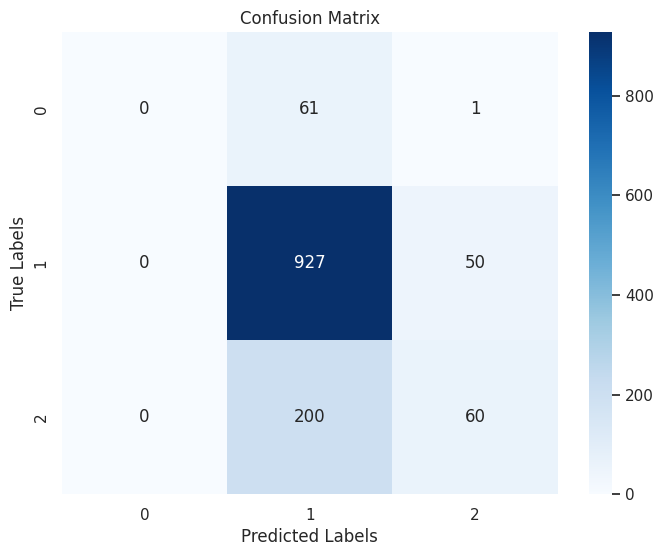

In [40]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [41]:
#Decision tree.
#Standard test-train split.
dt = DecisionTreeClassifier(criterion = "gini", #can use "gini" or "entropy"
                                  random_state = 100,
                                  max_depth=3,
                                  min_samples_leaf=5)

#Training.
dt_model = dt.fit(X_train, y_train)
pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print('accuracy',accuracy)
# Calculate precision score (macro average)
precision_macro = precision_score(y_test, pred, average='macro')
print("precision_score (macro):", precision_macro)

# Calculate recall score (macro average)
recall_macro = recall_score(y_test, pred, average='macro')
print("recall_score (macro):", recall_macro)

# Calculate F1 score (macro average)
f1_macro = f1_score(y_test, pred, average='macro')
print("f1_score (macro):", f1_macro)


accuracy 0.7659738260200154
precision_score (macro): 0.4612061040632469
recall_score (macro): 0.3818137679447813
f1_score (macro): 0.3774376768715067


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


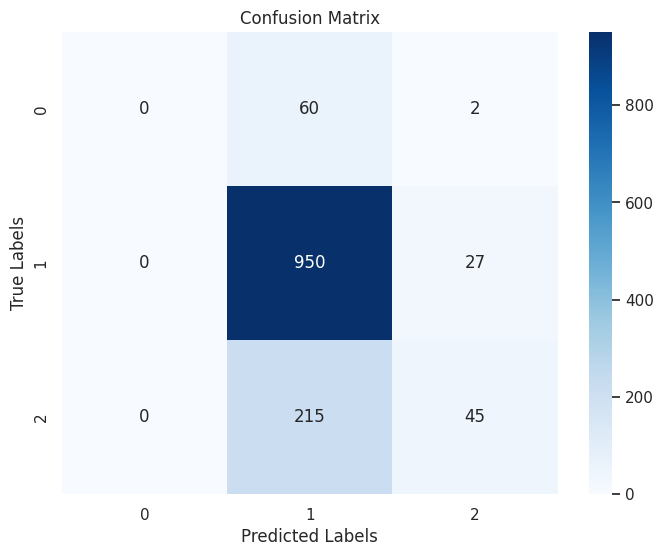

In [42]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [43]:
#K-NN algorithm.
classifier = KNeighborsClassifier(n_neighbors=5) #adjust to desired levels
classifier.fit(X_train, y_train)

#predictions.
pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print('accuracy',accuracy)

# Calculate precision score (macro average)
precision_macro = precision_score(y_test, pred, average='macro')
print("precision_score (macro):", precision_macro)

# Calculate recall score (macro average)
recall_macro = recall_score(y_test, pred, average='macro')
print("recall_score (macro):", recall_macro)

# Calculate F1 score (macro average)
f1_macro = f1_score(y_test, pred, average='macro')
print("f1_score (macro):", f1_macro)

accuracy 0.7644341801385681
precision_score (macro): 0.6139577620721174
recall_score (macro): 0.4690663168508448
f1_score (macro): 0.49597806314961645


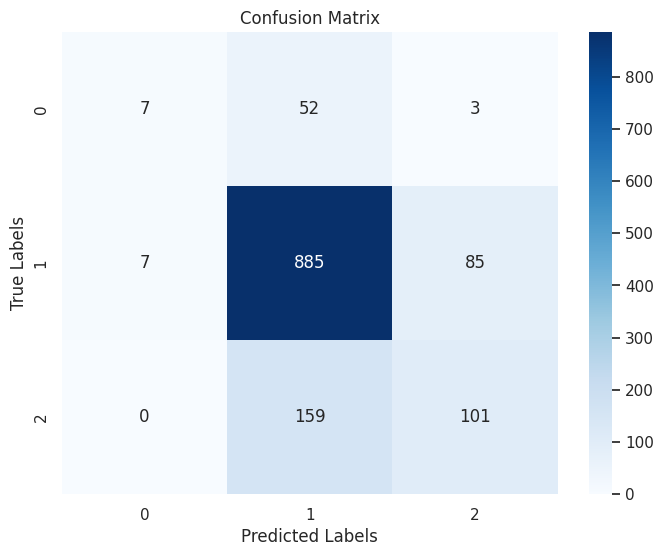

In [44]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [45]:
#Random forest classification.
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# predictions
pred = rfc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print('accuracy',accuracy)

# Calculate precision score (macro average)
precision_macro = precision_score(y_test, pred, average='macro')
print("precision_score (macro):", precision_macro)

# Calculate recall score (macro average)
recall_macro = recall_score(y_test, pred, average='macro')
print("recall_score (macro):", recall_macro)

# Calculate F1 score (macro average)
f1_macro = f1_score(y_test, pred, average='macro')
print("f1_score (macro):", f1_macro)

accuracy 0.783679753656659
precision_score (macro): 0.6990334988801247
recall_score (macro): 0.4568451133726665
f1_score (macro): 0.48220397283660205


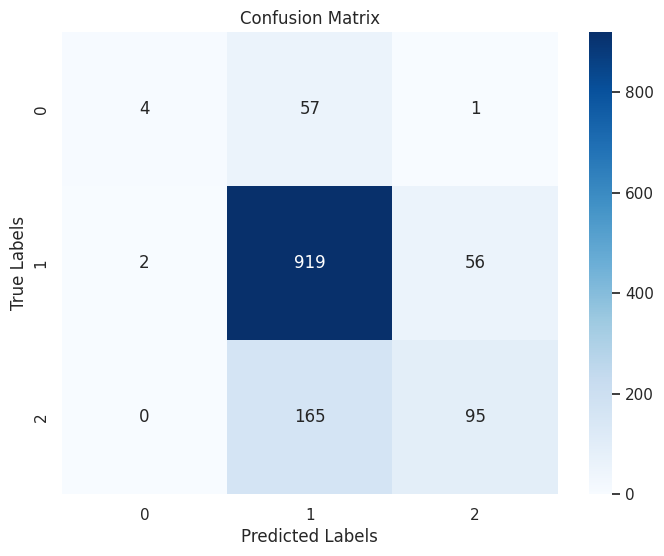

In [46]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [47]:
#SVM classification.
classifier = SVC(kernel='rbf')  # adjust the kernel type and other parameters as desired
classifier.fit(X_train, y_train)

# Predictions
pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print('accuracy',accuracy)

# Calculate precision score (macro average)
precision_macro = precision_score(y_test, pred, average='macro')
print("precision_score (macro):", precision_macro)

# Calculate recall score (macro average)
recall_macro = recall_score(y_test, pred, average='macro')
print("recall_score (macro):", recall_macro)

# Calculate F1 score (macro average)
f1_macro = f1_score(y_test, pred, average='macro')
print("f1_score (macro):", f1_macro)

accuracy 0.7729022324865281
precision_score (macro): 0.5094642478572943
recall_score (macro): 0.3801800383171929
f1_score (macro): 0.3742958335189713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


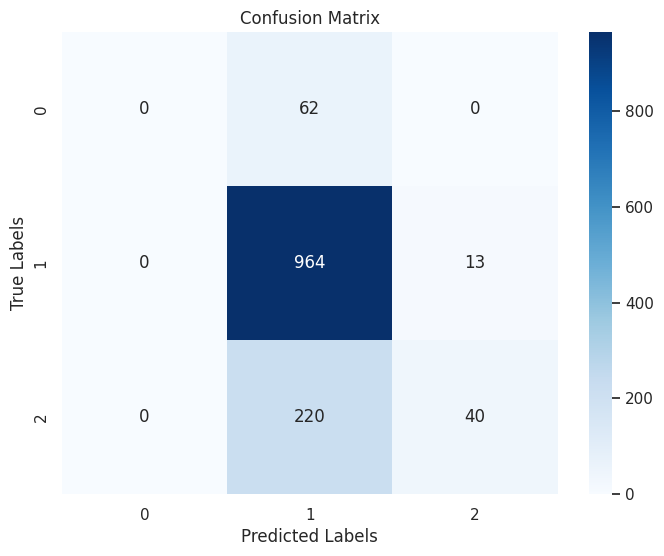

In [48]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()